In [1]:
pip install qiskit-nature

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install SciencePlots

Note: you may need to restart the kernel to use updated packages.


In [3]:
from qiskit_algorithms import VQE as VQE1


In [4]:
import numpy as np
import qiskit_nature
qiskit_nature.settings.use_pauli_sum_op = False
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
from qiskit.primitives import Estimator, BackendEstimator
#from qiskit.algorithms.minimum_eigensolvers import VQE as VQE1
# from qiskit.algorithms import VQE


In [5]:
from qiskit_algorithms import estimate_observables
from qiskit_algorithms.optimizers import COBYLA, SLSQP,SPSA,GradientDescent
from qiskit_algorithms.utils import algorithm_globals
from qiskit_aer import Aer
#from qiskit import I, X, Z,Y
from qiskit.quantum_info.operators import Operator, Pauli, SparsePauliOp


In [6]:
# This code is part of Qiskit.
#
# (C) Copyright IBM 2017.
#
# This code is licensed under the Apache License, Version 2.0. You may
# obtain a copy of this license in the LICENSE.txt file in the root directory
# of this source tree or at http://www.apache.org/licenses/LICENSE-2.0.
#
# Any modifications or derivative works of this code must retain this
# copyright notice, and modified files need to carry a notice indicating
# that they have been altered from the originals.

"""Identity gate."""

from typing import Optional
from qiskit.circuit.singleton import SingletonGate, stdlib_singleton_key
from qiskit.circuit._utils import with_gate_array
from qiskit._accelerate.circuit import StandardGate


@with_gate_array([[1, 0], [0, 1]])
class IGate(SingletonGate):
    r"""Identity gate.

    Identity gate corresponds to a single-qubit gate wait cycle,
    and should not be optimized or unrolled (it is an opaque gate).

    Can be applied to a :class:`~qiskit.circuit.QuantumCircuit`
    with the :meth:`~qiskit.circuit.QuantumCircuit.i` and
    :meth:`~qiskit.circuit.QuantumCircuit.id` methods.

    **Matrix Representation:**

    .. math::

        I = \begin{pmatrix}
                1 & 0 \\
                0 & 1
            \end{pmatrix}

    **Circuit symbol:**

    .. parsed-literal::
             ┌───┐
        q_0: ┤ I ├
             └───┘
    """

    _standard_gate = StandardGate.IGate

    def __init__(self, label: Optional[str] = None, *, duration=None, unit="dt"):
        """Create new Identity gate."""
        super().__init__("id", 1, [], label=label, duration=duration, unit=unit)

    _singleton_lookup_key = stdlib_singleton_key()

    def inverse(self, annotated: bool = False):
        """Returne the inverse gate (itself).

        Args:
            annotated: when set to ``True``, this is typically used to return an
                :class:`.AnnotatedOperation` with an inverse modifier set instead of a concrete
                :class:`.Gate`. However, for this class this argument is ignored as this gate
                is self-inverse.

        Returns:
            IGate: inverse gate (self-inverse).
        ."""
        return IGate()  # self-inverse

    def power(self, exponent: float, annotated: bool = False):
        return IGate()

    def __eq__(self, other):
        return isinstance(other, IGate)

In [7]:
import os
from setuptools import setup


In [8]:

#from qiskit.algorithms.observables_evaluator import estimate_observables
#from qiskit.algorithms.optimizers import COBYLA, SLSQP,SPSA,GradientDescent
from qiskit.circuit import QuantumCircuit, Parameter
from qiskit.circuit.library import TwoLocal
from qiskit_nature.second_q.operators import FermionicOp
from qiskit_nature.second_q.mappers import JordanWignerMapper
from qiskit.quantum_info import Pauli, SparsePauliOp
#from qiskit.utils import algorithm_globals
from fractions import Fraction
from scipy.sparse.linalg import eigsh
from qiskit import QuantumCircuit
from qiskit.circuit import Gate
#from qiskit import Aer
from qiskit import *
#from qiskit.opflow import I, X, Z,Y
import scienceplots
plt.style.use(['science','notebook','grid'])


In [9]:


with open('Qbit_mapped_all_M_JUN45.out','r') as f:
    lines = f.readlines()
    N_Qbits = int(lines[1].split('=')[1])
    # print(lines)
    two_body_string = 'Qubit mapped matrix elements of V All M'
    two_body_string_end = 'End V'

    One_body_string = 'Qubit mapped matrix elements of KE all M'
    One_body_string_end = 'End KE'

    for i,line in enumerate(lines):
        if two_body_string in line:
            # print(i,line)
            start_V = i
        if two_body_string_end in line:
            # print(i,line)
            end_V = i
        if One_body_string in line:
            # print(i,line)
            start_KE = i
        if One_body_string_end in line:
            # print(i,line)
            end_KE = i
    
    Hamiltonian_Coeff = {}
    for line in lines[start_V+1:end_V]:
        # print(line)
        data = line.split()
        key = '+_{} +_{} -_{} -_{}'.format(data[0],data[1],data[3],data[2]) #0=i,1=j,2=k,3=l
        value = float(data[-1])
        # print(key,value)
        Hamiltonian_Coeff[key] = value#*0.5        #multiply by 0.5
    
    for line in lines[start_KE+1:end_KE]:
        data = line.split()
        key = '+_{} -_{}'.format(data[0],data[1])
        value = float(data[-1])
        # print(key,value)
        # Hamiltonian_Coeff[key] = value_ 


In [10]:

with open('Input_pfg_m_scheme.in', 'r') as f:
    lines = f.readlines()
    l1 = lines[0].split('=')[1].replace('[','').replace(']','').split(',')
    # print(l1)
    levels = {}
    for l in l1:
        data = l.split(':')
        # print(data)
        levels[int(data[0])] = (data[1].replace('\'', '')).replace('\n', '')
    print('levels = {}'.format(levels))


    l2 = lines[1].split('=')[1].replace('[', '').replace(']', '').split(',')
    # print(l2)
    energies = {}
    for l in l2:
        data = l.split(':')
        energies[int(data[0])] = float(data[1])
    print('energes = {}'.format(energies))

ene=[]
for key, val in levels.items():
    j = float(Fraction(val.split(';')[0][2:]))
    ene = ene+[energies[key]]*int(2*j+1)
print(ene)

for i in range(N_Qbits):
    key = '+_{} -_{}'.format(i,i)
    value = ene[i]
    # print(key,value)
    # Hamiltonian_Coeff[key] = value


print(end_V-start_V-1)
        

# print(Hamiltonian_Coeff)
# print(N_Qbits)


levels = {1: '1p3/2;n', 2: '0f5/2;n', 3: '1p1/2;n', 4: '0g9/2;n'}
energes = {1: -9.828, 2: -8.7087, 3: -7.8388, 4: -6.2617}
[-9.828, -9.828, -9.828, -9.828, -8.7087, -8.7087, -8.7087, -8.7087, -8.7087, -8.7087, -7.8388, -7.8388, -6.2617, -6.2617, -6.2617, -6.2617, -6.2617, -6.2617, -6.2617, -6.2617, -6.2617, -6.2617]
96


In [11]:



Hamiltonian_op = FermionicOp(
    Hamiltonian_Coeff,
    num_spin_orbitals=N_Qbits,
)

Hamiltonian_op

mapper = JordanWignerMapper()
qubit_hamiltonian = mapper.map(Hamiltonian_op)
if not isinstance(qubit_hamiltonian, SparsePauliOp):
        qubit_hamiltonian = qubit_hamiltonian.primitive


print(len(qubit_hamiltonian))


reference_value=-20.990
if N_Qbits==22:
    reference_value=-21.447

print(qubit_hamiltonian)

if N_Qbits <12:
    eigenvalues, eigenstates = np.linalg.eigh(qubit_hamiltonian.to_matrix())
    # eigenvalues, eigenvectors = eigsh(qubit_hamiltonian.to_matrix(), k=6,which='SA')
    # eigenvalues
    # print(eigenvalues)
    reference_value = eigenvalues[0]
    print("Exact binding energy for H = {}".format(reference_value))


def String_to_PauliOP(S):
    if S == 'I':
        return I
    elif S == 'X':
        return X
    elif S == 'Y':
        return Y
    elif S == 'Z':
        return Z
    


199
SparsePauliOp(['IIIIIIIIIIII', 'IIIIIIIIIIZI', 'IIIIIIZIIIII', 'IIIIIIZIIIZI', 'IIIIZIIIIIII', 'IIIIZIZIIIII', 'IIIIZIIIIIZI', 'IIIIIIIIZIII', 'IIIIIIZIZIII', 'IIZIIIIIIIII', 'IIZIIIZIIIII', 'ZIIIIIIIIIII', 'ZIIIIIZIIIII', 'IIIIIIIIZIZI', 'IIZIIIIIIIZI', 'ZIIIIIIIIIZI', 'IIIIZIIIZIII', 'IIIIIIIIIZII', 'IIIIIIZIIZII', 'IIIZIIIIIIII', 'IIIZIIZIIIII', 'IZIIIIIIIIII', 'IZIIIIZIIIII', 'IIZIZIIIIIII', 'ZIIIZIIIIIII', 'IIIIIIIIIZZI', 'IIIZIIIIIIZI', 'IZIIIIIIIIZI', 'IIZIIIIIZIII', 'ZIIIIIIIZIII', 'IIIIZIIIIZII', 'IIIIIIIIIIIZ', 'IIIIIIZIIIIZ', 'IIIIIZIIIIII', 'IIIIIZZIIIII', 'IIIZZIIIIIII', 'IZIIZIIIIIII', 'ZIZIIIIIIIII', 'IIIIIIIIIIZZ', 'IIIIIIIIXYXY', 'IIIIIIIIYXXY', 'IIIIIIIIYYXX', 'IIIIIIIIXXXX', 'IIIIIIIIYYYY', 'IIIIIIIIXXYY', 'IIIIIIIIXYYX', 'IIIIIIIIYXYX', 'IIIIIIXYIIXY', 'IIIIIIYXIIXY', 'IIIIIIYYIIXX', 'IIIIIIXXIIXX', 'IIIIIIYYIIYY', 'IIIIIIXXIIYY', 'IIIIIIXYIIYX', 'IIIIIIYXIIYX', 'IIIIXYIIIIXY', 'IIIIYXIIIIXY', 'IIIIYYIIIIXX', 'IIIIXXIIIIXX', 'IIIIYYIIIIYY', 'IIIIXXIIIIYY', 'IIII

In [12]:

#H2_op=qubit_hamiltonian.coeffs[0]*String_to_PauliOP(str(qubit_hamiltonian.paulis[0][0]))
#for s in qubit_hamiltonian.paulis[0][1:]:
   #H2_op = H2_op^String_to_PauliOP(str(s))
    




# for Pauli_ops, coefs in zip(qubit_hamiltonian.paulis[1:],qubit_hamiltonian.coeffs[1:]):
#     term = coefs*String_to_PauliOP(str(Pauli_ops[0]))
#     for s in Pauli_ops[1:]:
#         # print(s)
#         term = term^String_to_PauliOP(str(s))
#     H2_op += term
    
# print(H2_op)


In [13]:


def Double_excitation(theta):
    circ = QuantumCircuit(4,name='Double Excitation')
    circ.cx(2,3)
    circ.cx(0,2)
    circ.h([0,3])
    circ.cx(0,1)
    circ.cx(2,3)
    circ.ry(-theta/8,0)
    circ.ry(theta/8,1)
    circ.cx(0,3)
    circ.h(3)
    circ.cx(3,1)
    circ.ry(-theta/8,0)
    circ.ry(theta/8,1)
    circ.cx(2,1)
    circ.cx(2,0)
    circ.ry(theta/8,0)
    circ.ry(-theta/8,1)
    circ.cx(3,1)
    circ.h(3)
    circ.cx(0,3)
    circ.ry(theta/8,0)
    circ.ry(-theta/8,1)
    circ.cx(0,1)
    circ.cx(2,0)
    circ.h([0,3])
    circ.cx(0,2)
    circ.cx(2,3)
    return circ

def Ensatz(Qbits,InitialState,Thetas):
    circ = QuantumCircuit(Qbits,name='Ensatz')
    circ.x(InitialState)
    Nmax_dble = Qbits//2 - 1
    Initial_qbit=0
    for i in range(Nmax_dble):
        doubleExci = Double_excitation(Thetas[i])
        circ.append(doubleExci,list(range(Initial_qbit,Initial_qbit+4)))
        Initial_qbit += 2
    return circ


from qiskit.circuit import Parameter

Parameters=[]
for i in range(N_Qbits//2-1):
    theta = Parameter('theta_{}'.format(i))         # for different theta at every excitation
    Parameters.append(theta)

# Parameters = [Parameter('theta')]*(N_Qbits//2-1)   # for same theta everwhere
gs_ini = [0,1]
no_of_ops = 0
db_exc = []

ansatz = Ensatz(N_Qbits,gs_ini,Parameters)
ansatz.draw('mpl').savefig('Circuit_for_Ensatz.png')


In [14]:


def callback(eval_count, parameters, mean, std):
    # Overwrites the same line when printing
    display("Evaluation: {}, Energy: {}, Std: {}".format(eval_count, mean, std))
    clear_output(wait=True)
    counts.append(eval_count)
    values.append(mean)
    params.append(parameters)
    deviation.append(std)
    means.append(mean)


seed = 500
algorithm_globals.random_seed = seed
# for i in range(runs)
counts = []
values = []
params = []
deviation = []
means=[]
Iterations=1000
backend = Aer.get_backend('statevector_simulator')
# backend = Aer.get_backend('qasm_simulator')

Optimizer_name = 'COBYLA'
# Optimizer_name = 'SPSA'
# Optimizer_name = 'SLSQP'
# Optimizer_name = 'GradientDescent'

if Optimizer_name == 'COBYLA':
    optimizer = COBYLA(maxiter=Iterations)
elif Optimizer_name == 'SPSA':
    optimizer = SPSA(maxiter=Iterations)
elif Optimizer_name == 'SLSQP':
    optimizer = SLSQP(maxiter=Iterations)
elif Optimizer_name == 'GradientDescent':
    optimizer = GradientDescent(maxiter=Iterations, learning_rate=0.1)

vqe = VQE1(
    Estimator(),
    # BackendEstimator(backend=backend,options={'shots':8000}),
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback,
)
# vqe = VQE(
#     ansatz=ansatz,
#     optimizer=optimizer,
#     callback=callback,
#     quantum_instance=backend
# )

vqe_result = vqe.compute_minimum_eigenvalue(qubit_hamiltonian)
# vqe_result = vqe.compute_minimum_eigenvalue(H2_op) 


'Evaluation: 138, Energy: -20.990272868685036, Std: {}'

{'000000110000': 0.04675, '000000001100': 0.3915, '001100000000': 0.04725, '000000000011': 0.4085, '110000000000': 0.0575, '000011000000': 0.0485}
[]


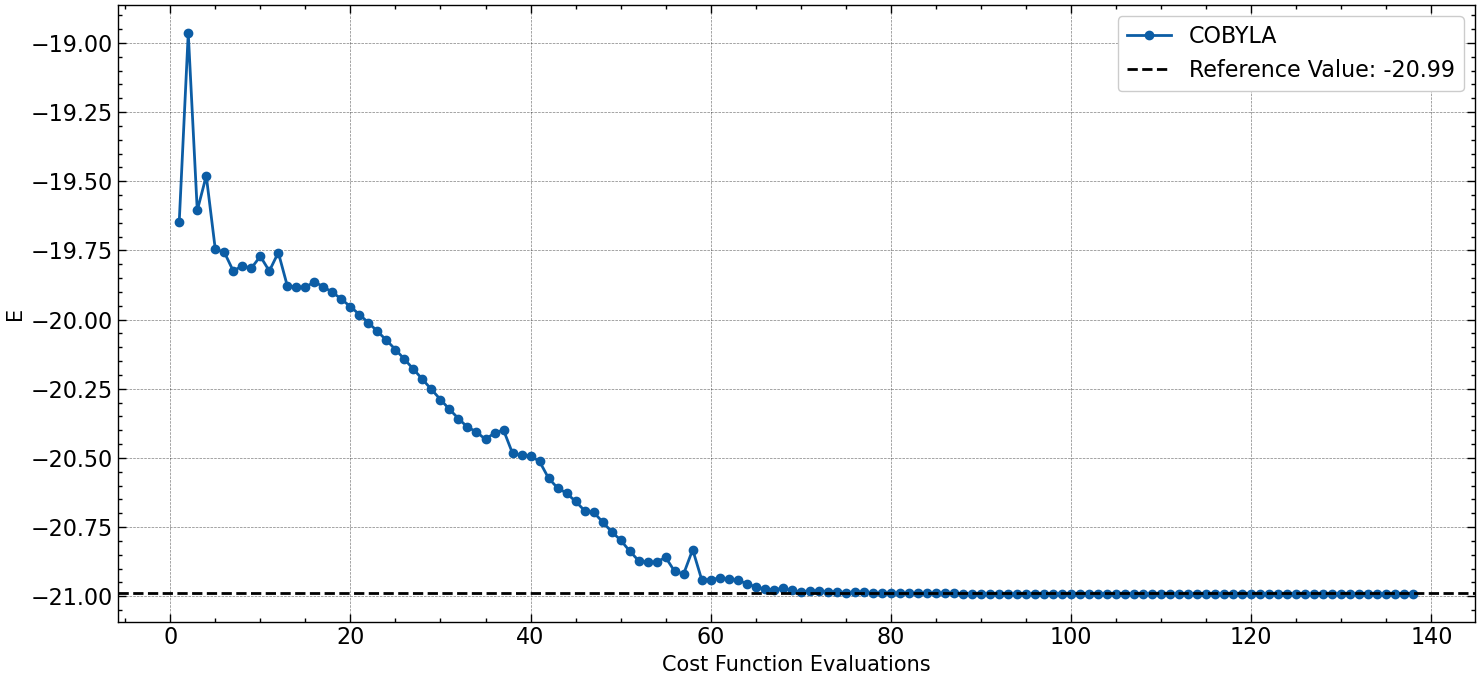

In [15]:


np.rad2deg(params[-1])
Ground = Ensatz(N_Qbits,[0,1],params[-1])
Ground.measure_all()
# Ground.draw('mpl')

backend = Aer.get_backend('statevector_simulator')
# job = backend.run(i_state)
shots=8000
job = backend.run(transpile(Ground, backend), shots=shots)
result = job.result()
COUNTS = result.get_counts(Ground)


for key,val in COUNTS.items():
    COUNTS[key] = val/shots


print(COUNTS)
from qiskit.visualization import plot_histogram
plot_histogram(COUNTS)


with open('Ground_wavefunction1.WF','w') as f:
    for key,val in COUNTS.items():
        f.write('%s \t %f \t \n' %(key[::-1],val))


# deviation
errors =[]
for d in deviation:
    if 'variance' in d.keys():
        errors.append(np.sqrt(d['variance'])/2)


print(errors)

file = 'JW_result_'+Optimizer_name+'_'+str(N_Qbits)+'qbits.out'
with open(file,'w') as f:
    if len(errors)>1:
        for c,v,e in zip(counts,values,errors):
            f.write('{} \t {} \t {} \n'.format(c,v,e))
    else:
        for c,v in zip(counts,values):
            f.write('{} \t {} \n'.format(c,v))
        

fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches((15, 7))
ax.plot(counts, values, "o-", label=Optimizer_name)
if len(errors)>1:
    ax.errorbar(counts, values,
                yerr = errors,
                fmt ='o')
ax.axhline(y=reference_value,color="k",linestyle="--",label=f"Reference Value: {reference_value}",)
ax.legend()
ax.set_xlabel("Cost Function Evaluations", fontsize=15)
ax.set_ylabel(r"E".format(i + 1), fontsize=15)
plt.tight_layout()
fig.savefig('{}_Qbit_JUN45_VQE_{}.png'.format(N_Qbits,Optimizer_name),dpi=350)
fig.savefig('{}_Qbit_JUN45_VQE_{}.pdf'.format(N_Qbits,Optimizer_name),format='pdf')


{'000011000000': 0.045, '110000000000': 0.061125, '000000001100': 0.405125, '001100000000': 0.047625, '000000110000': 0.04925, '000000000011': 0.391875}


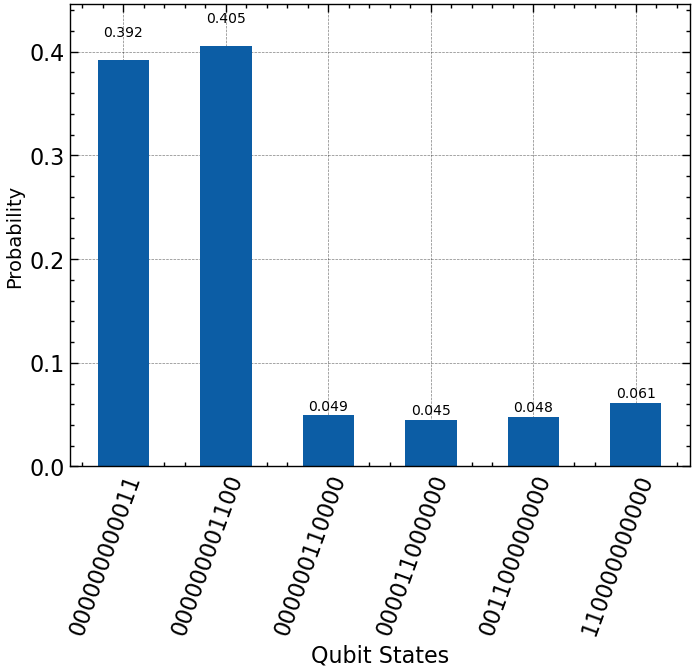

In [16]:


file = 'WF_parameters_vqe'+Optimizer_name+'_'+str(N_Qbits)+'.out'
with open(file,'w') as f:
    for p in params[-1]:
        f.write('{} \n'.format(p))

Ground = Ensatz(N_Qbits,gs_ini,params[-1])
Ground.measure_all()
backend = Aer.get_backend('statevector_simulator')
# job = backend.run(i_state)
shots=8000
job = backend.run(transpile(Ground, backend), shots=shots)
result = job.result()
COUNTS = result.get_counts(Ground)

for key,val in COUNTS.items():
    COUNTS[key] = val/shots

print(COUNTS)
from qiskit.visualization import plot_histogram

fig1,ax1 = plt.subplots(nrows=1, ncols=1)
plot_histogram(COUNTS,ax=ax1)
ax1.set_ylabel('Probability')
ax1.set_xlabel('Qubit States')
fig1.savefig('Wavefunctions_{}_JUN45_VQE_{}.png'.format(N_Qbits,Optimizer_name),dpi=350)
fig1.savefig('Wavefunctions_{}_JUN45_VQE_{}.pdf'.format(N_Qbits,Optimizer_name),format='pdf')


In [17]:


def callback(eval_count, parameters, mean, std):
    # Overwrites the same line when printing
    display("Evaluation: {}, Energy: {}, Std: {}".format(eval_count, mean, std))
    clear_output(wait=True)
    counts.append(eval_count)
    values.append(mean)
    params.append(parameters)
    deviation.append(std)
    means.append(mean)


seed = 500
algorithm_globals.random_seed = seed
# for i in range(runs)
counts = []
values = []
params = []
deviation = []
means=[]
Iterations=1000
backend = Aer.get_backend('statevector_simulator')
# backend = Aer.get_backend('qasm_simulator')

#Optimizer_name = 'COBYLA'
Optimizer_name = 'SPSA'
# Optimizer_name = 'SLSQP'
# Optimizer_name = 'GradientDescent'

if Optimizer_name == 'COBYLA':
    optimizer = COBYLA(maxiter=Iterations)
elif Optimizer_name == 'SPSA':
    optimizer = SPSA(maxiter=Iterations)
elif Optimizer_name == 'SLSQP':
    optimizer = SLSQP(maxiter=Iterations)
elif Optimizer_name == 'GradientDescent':
    optimizer = GradientDescent(maxiter=Iterations, learning_rate=0.1)

vqe = VQE1(
    Estimator(),
    # BackendEstimator(backend=backend,options={'shots':8000}),
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback,
)
# vqe = VQE(
#     ansatz=ansatz,
#     optimizer=optimizer,
#     callback=callback,
#     quantum_instance=backend
# )

vqe_result = vqe.compute_minimum_eigenvalue(qubit_hamiltonian)
# vqe_result = vqe.compute_minimum_eigenvalue(H2_op) 


'Evaluation: 2051, Energy: -20.988892702495868, Std: {}'

{'110000000000': 0.059875, '000011000000': 0.04125, '001100000000': 0.0475, '000000001100': 0.3885, '000000110000': 0.052375, '000000000011': 0.4105}
[]


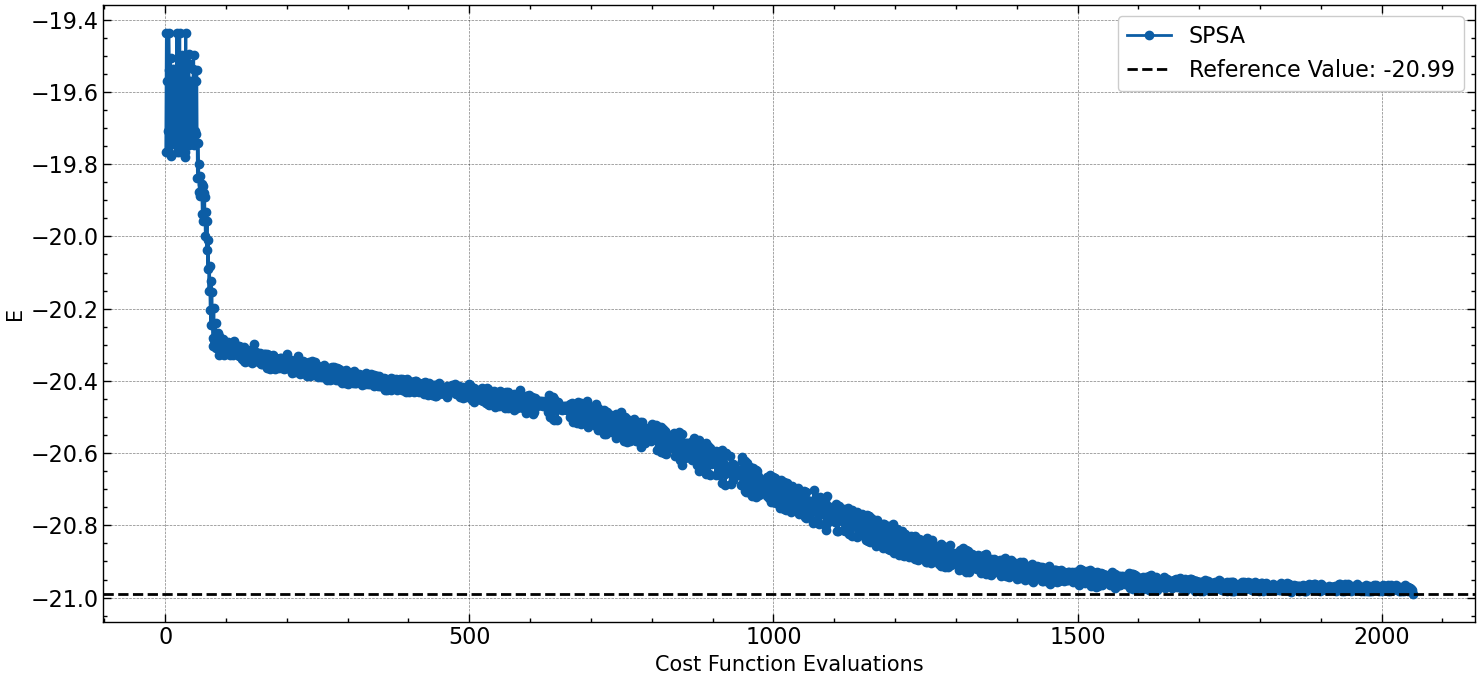

In [18]:


np.rad2deg(params[-1])
Ground = Ensatz(N_Qbits,[0,1],params[-1])
Ground.measure_all()
# Ground.draw('mpl')

backend = Aer.get_backend('statevector_simulator')
# job = backend.run(i_state)
shots=8000
job = backend.run(transpile(Ground, backend), shots=shots)
result = job.result()
COUNTS = result.get_counts(Ground)


for key,val in COUNTS.items():
    COUNTS[key] = val/shots


print(COUNTS)
from qiskit.visualization import plot_histogram
plot_histogram(COUNTS)


with open('Ground_wavefunction1.WF','w') as f:
    for key,val in COUNTS.items():
        f.write('%s \t %f \t \n' %(key[::-1],val))


# deviation
errors =[]
for d in deviation:
    if 'variance' in d.keys():
        errors.append(np.sqrt(d['variance'])/2)


print(errors)

file = 'JW_result_'+Optimizer_name+'_'+str(N_Qbits)+'qbits.out'
with open(file,'w') as f:
    if len(errors)>1:
        for c,v,e in zip(counts,values,errors):
            f.write('{} \t {} \t {} \n'.format(c,v,e))
    else:
        for c,v in zip(counts,values):
            f.write('{} \t {} \n'.format(c,v))
        

fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches((15, 7))
ax.plot(counts, values, "o-", label=Optimizer_name)
if len(errors)>1:
    ax.errorbar(counts, values,
                yerr = errors,
                fmt ='o')
ax.axhline(y=reference_value,color="k",linestyle="--",label=f"Reference Value: {reference_value}",)
ax.legend()
ax.set_xlabel("Cost Function Evaluations", fontsize=15)
ax.set_ylabel(r"E".format(i + 1), fontsize=15)
plt.tight_layout()
fig.savefig('{}_Qbit_JUN45_VQE_{}.png'.format(N_Qbits,Optimizer_name),dpi=350)
fig.savefig('{}_Qbit_JUN45_VQE_{}.pdf'.format(N_Qbits,Optimizer_name),format='pdf')


{'000011000000': 0.03525, '110000000000': 0.063, '000000001100': 0.403, '001100000000': 0.044375, '000000000011': 0.40325, '000000110000': 0.051125}


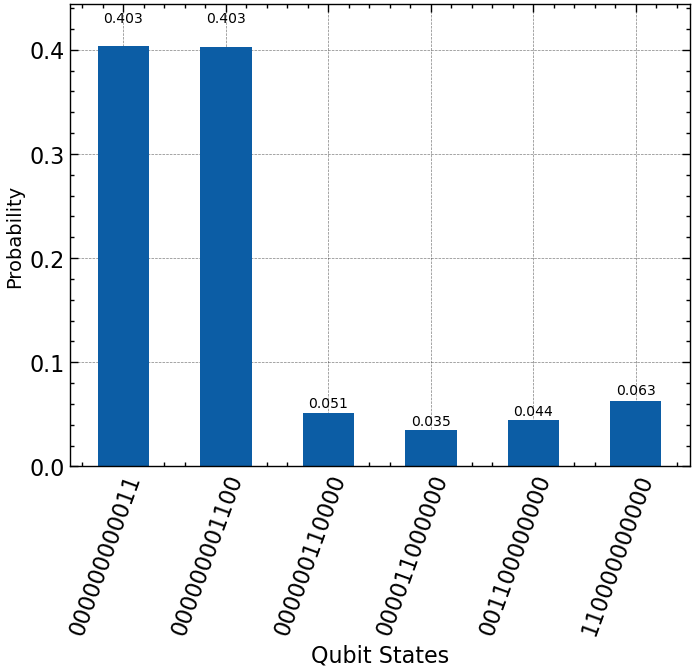

In [19]:


file = 'WF_parameters_vqe'+Optimizer_name+'_'+str(N_Qbits)+'.out'
with open(file,'w') as f:
    for p in params[-1]:
        f.write('{} \n'.format(p))

Ground = Ensatz(N_Qbits,gs_ini,params[-1])
Ground.measure_all()
backend = Aer.get_backend('statevector_simulator')
# job = backend.run(i_state)
shots=8000
job = backend.run(transpile(Ground, backend), shots=shots)
result = job.result()
COUNTS = result.get_counts(Ground)

for key,val in COUNTS.items():
    COUNTS[key] = val/shots

print(COUNTS)
from qiskit.visualization import plot_histogram

fig1,ax1 = plt.subplots(nrows=1, ncols=1)
plot_histogram(COUNTS,ax=ax1)
ax1.set_ylabel('Probability')
ax1.set_xlabel('Qubit States')
fig1.savefig('Wavefunctions_{}_JUN45_VQE_{}.png'.format(N_Qbits,Optimizer_name),dpi=350)
fig1.savefig('Wavefunctions_{}_JUN45_VQE_{}.pdf'.format(N_Qbits,Optimizer_name),format='pdf')


In [20]:


def callback(eval_count, parameters, mean, std):
    # Overwrites the same line when printing
    display("Evaluation: {}, Energy: {}, Std: {}".format(eval_count, mean, std))
    clear_output(wait=True)
    counts.append(eval_count)
    values.append(mean)
    params.append(parameters)
    deviation.append(std)
    means.append(mean)


seed = 500
algorithm_globals.random_seed = seed
# for i in range(runs)
counts = []
values = []
params = []
deviation = []
means=[]
Iterations=1000
backend = Aer.get_backend('statevector_simulator')
# backend = Aer.get_backend('qasm_simulator')

#Optimizer_name = 'COBYLA'
#Optimizer_name = 'SPSA'
Optimizer_name = 'SLSQP'
# Optimizer_name = 'GradientDescent'

if Optimizer_name == 'COBYLA':
    optimizer = COBYLA(maxiter=Iterations)
elif Optimizer_name == 'SPSA':
    optimizer = SPSA(maxiter=Iterations)
elif Optimizer_name == 'SLSQP':
    optimizer = SLSQP(maxiter=Iterations)
elif Optimizer_name == 'GradientDescent':
    optimizer = GradientDescent(maxiter=Iterations, learning_rate=0.1)

vqe = VQE1(
    Estimator(),
    # BackendEstimator(backend=backend,options={'shots':8000}),
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback,
)
# vqe = VQE(
#     ansatz=ansatz,
#     optimizer=optimizer,
#     callback=callback,
#     quantum_instance=backend
# )

vqe_result = vqe.compute_minimum_eigenvalue(qubit_hamiltonian)
# vqe_result = vqe.compute_minimum_eigenvalue(H2_op) 


'Evaluation: 135, Energy: -20.990272550791104, Std: {}'

{'000011000000': 0.0485, '110000000000': 0.060375, '001100000000': 0.045625, '000000001100': 0.39875, '000000110000': 0.048875, '000000000011': 0.397875}
[]


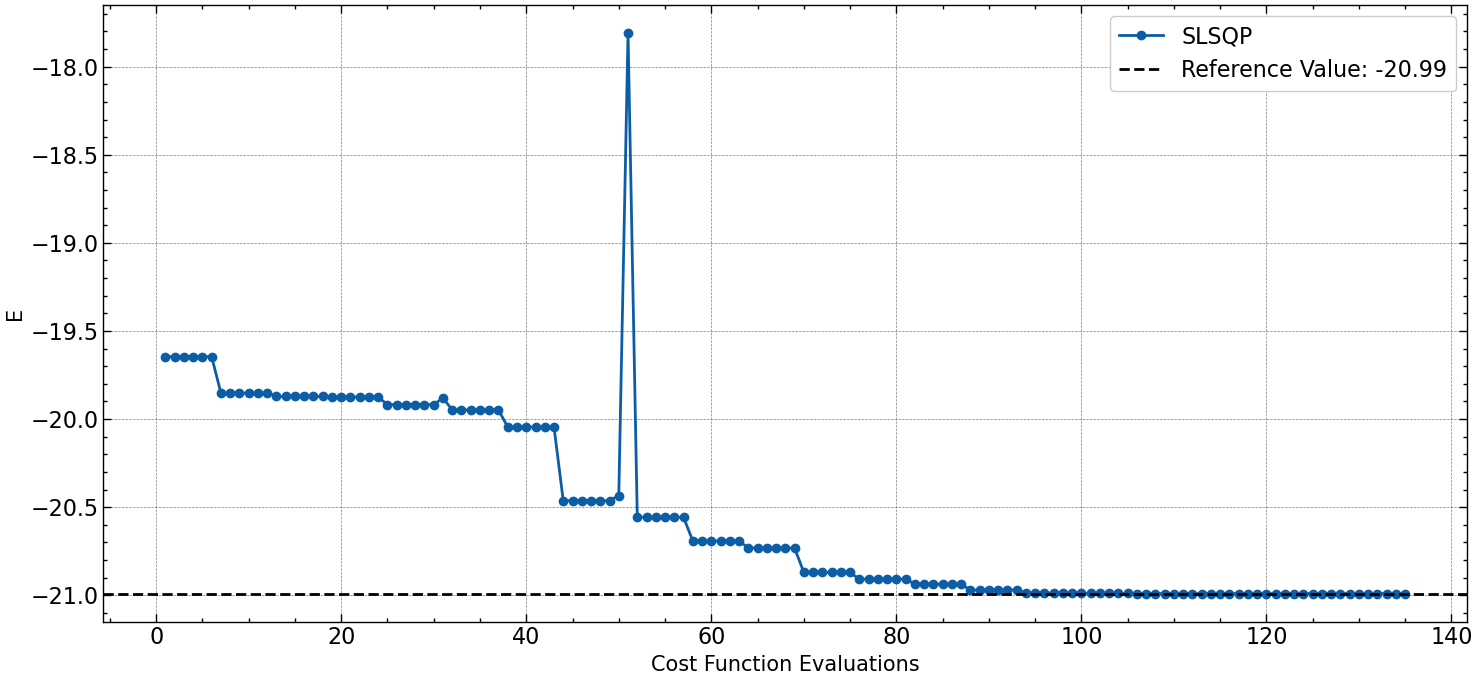

In [21]:


np.rad2deg(params[-1])
Ground = Ensatz(N_Qbits,[0,1],params[-1])
Ground.measure_all()
# Ground.draw('mpl')

backend = Aer.get_backend('statevector_simulator')
# job = backend.run(i_state)
shots=8000
job = backend.run(transpile(Ground, backend), shots=shots)
result = job.result()
COUNTS = result.get_counts(Ground)


for key,val in COUNTS.items():
    COUNTS[key] = val/shots


print(COUNTS)
from qiskit.visualization import plot_histogram
plot_histogram(COUNTS)


with open('Ground_wavefunction1.WF','w') as f:
    for key,val in COUNTS.items():
        f.write('%s \t %f \t \n' %(key[::-1],val))


# deviation
errors =[]
for d in deviation:
    if 'variance' in d.keys():
        errors.append(np.sqrt(d['variance'])/2)


print(errors)

file = 'JW_result_'+Optimizer_name+'_'+str(N_Qbits)+'qbits.out'
with open(file,'w') as f:
    if len(errors)>1:
        for c,v,e in zip(counts,values,errors):
            f.write('{} \t {} \t {} \n'.format(c,v,e))
    else:
        for c,v in zip(counts,values):
            f.write('{} \t {} \n'.format(c,v))
        

fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches((15, 7))
ax.plot(counts, values, "o-", label=Optimizer_name)
if len(errors)>1:
    ax.errorbar(counts, values,
                yerr = errors,
                fmt ='o')
ax.axhline(y=reference_value,color="k",linestyle="--",label=f"Reference Value: {reference_value}",)
ax.legend()
ax.set_xlabel("Cost Function Evaluations", fontsize=15)
ax.set_ylabel(r"E".format(i + 1), fontsize=15)
plt.tight_layout()
fig.savefig('{}_Qbit_JUN45_VQE_{}.png'.format(N_Qbits,Optimizer_name),dpi=350)
fig.savefig('{}_Qbit_JUN45_VQE_{}.pdf'.format(N_Qbits,Optimizer_name),format='pdf')


{'110000000000': 0.061625, '000011000000': 0.0475, '001100000000': 0.044, '000000001100': 0.393375, '000000110000': 0.046875, '000000000011': 0.406625}


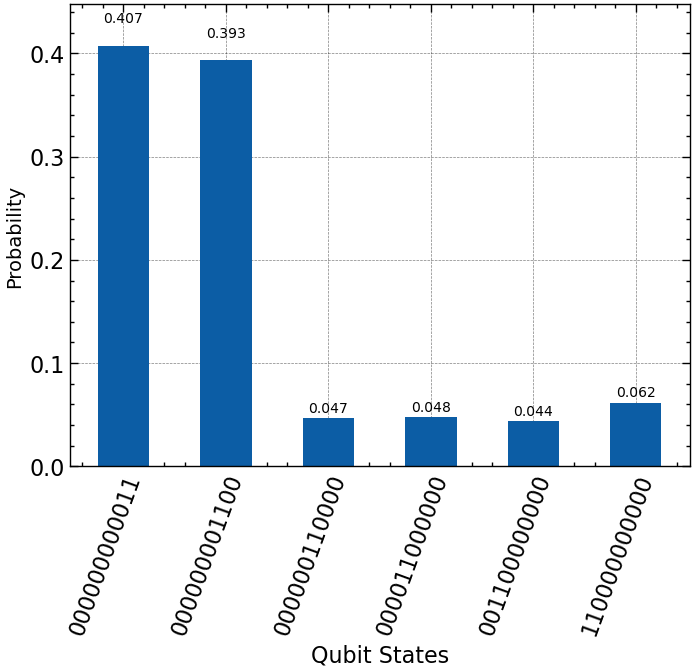

In [22]:


file = 'WF_parameters_vqe'+Optimizer_name+'_'+str(N_Qbits)+'.out'
with open(file,'w') as f:
    for p in params[-1]:
        f.write('{} \n'.format(p))

Ground = Ensatz(N_Qbits,gs_ini,params[-1])
Ground.measure_all()
backend = Aer.get_backend('statevector_simulator')
# job = backend.run(i_state)
shots=8000
job = backend.run(transpile(Ground, backend), shots=shots)
result = job.result()
COUNTS = result.get_counts(Ground)

for key,val in COUNTS.items():
    COUNTS[key] = val/shots

print(COUNTS)
from qiskit.visualization import plot_histogram

fig1,ax1 = plt.subplots(nrows=1, ncols=1)
plot_histogram(COUNTS,ax=ax1)
ax1.set_ylabel('Probability')
ax1.set_xlabel('Qubit States')
fig1.savefig('Wavefunctions_{}_JUN45_VQE_{}.png'.format(N_Qbits,Optimizer_name),dpi=350)
fig1.savefig('Wavefunctions_{}_JUN45_VQE_{}.pdf'.format(N_Qbits,Optimizer_name),format='pdf')


In [23]:


def callback(eval_count, parameters, mean, std):
    # Overwrites the same line when printing
    display("Evaluation: {}, Energy: {}, Std: {}".format(eval_count, mean, std))
    clear_output(wait=True)
    counts.append(eval_count)
    values.append(mean)
    params.append(parameters)
    deviation.append(std)
    means.append(mean)


seed = 500
algorithm_globals.random_seed = seed
# for i in range(runs)
counts = []
values = []
params = []
deviation = []
means=[]
Iterations=1000
backend = Aer.get_backend('statevector_simulator')
# backend = Aer.get_backend('qasm_simulator')

#Optimizer_name = 'COBYLA'
#Optimizer_name = 'SPSA'
#Optimizer_name = 'SLSQP'
Optimizer_name = 'GradientDescent'

if Optimizer_name == 'COBYLA':
    optimizer = COBYLA(maxiter=Iterations)
elif Optimizer_name == 'SPSA':
    optimizer = SPSA(maxiter=Iterations)
elif Optimizer_name == 'SLSQP':
    optimizer = SLSQP(maxiter=Iterations)
elif Optimizer_name == 'GradientDescent':
    optimizer = GradientDescent(maxiter=Iterations, learning_rate=0.1)

vqe = VQE1(
    Estimator(),
    # BackendEstimator(backend=backend,options={'shots':8000}),
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback,
)
# vqe = VQE(
#     ansatz=ansatz,
#     optimizer=optimizer,
#     callback=callback,
#     quantum_instance=backend
# )

vqe_result = vqe.compute_minimum_eigenvalue(qubit_hamiltonian)
# vqe_result = vqe.compute_minimum_eigenvalue(H2_op) 


'Evaluation: 6001, Energy: -20.990238756178936, Std: {}'

{'000000110000': 0.046375, '110000000000': 0.064125, '000000001100': 0.405875, '001100000000': 0.045625, '000000000011': 0.389625, '000011000000': 0.048375}
[]


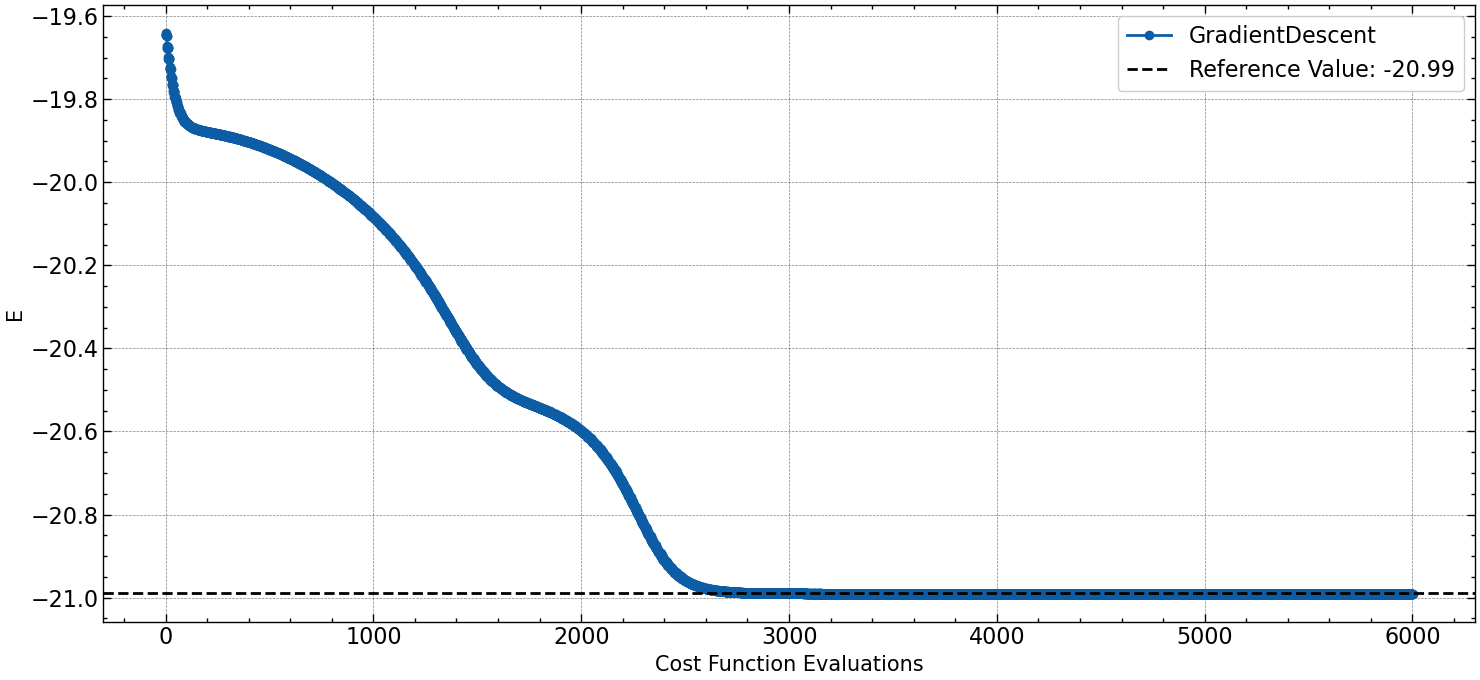

In [24]:


np.rad2deg(params[-1])
Ground = Ensatz(N_Qbits,[0,1],params[-1])
Ground.measure_all()
# Ground.draw('mpl')

backend = Aer.get_backend('statevector_simulator')
# job = backend.run(i_state)
shots=8000
job = backend.run(transpile(Ground, backend), shots=shots)
result = job.result()
COUNTS = result.get_counts(Ground)


for key,val in COUNTS.items():
    COUNTS[key] = val/shots


print(COUNTS)
from qiskit.visualization import plot_histogram
plot_histogram(COUNTS)


with open('Ground_wavefunction1.WF','w') as f:
    for key,val in COUNTS.items():
        f.write('%s \t %f \t \n' %(key[::-1],val))


# deviation
errors =[]
for d in deviation:
    if 'variance' in d.keys():
        errors.append(np.sqrt(d['variance'])/2)


print(errors)

file = 'JW_result_'+Optimizer_name+'_'+str(N_Qbits)+'qbits.out'
with open(file,'w') as f:
    if len(errors)>1:
        for c,v,e in zip(counts,values,errors):
            f.write('{} \t {} \t {} \n'.format(c,v,e))
    else:
        for c,v in zip(counts,values):
            f.write('{} \t {} \n'.format(c,v))
        

fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches((15, 7))
ax.plot(counts, values, "o-", label=Optimizer_name)
if len(errors)>1:
    ax.errorbar(counts, values,
                yerr = errors,
                fmt ='o')
ax.axhline(y=reference_value,color="k",linestyle="--",label=f"Reference Value: {reference_value}",)
ax.legend()
ax.set_xlabel("Cost Function Evaluations", fontsize=15)
ax.set_ylabel(r"E".format(i + 1), fontsize=15)
plt.tight_layout()
fig.savefig('{}_Qbit_JUN45_VQE_{}.png'.format(N_Qbits,Optimizer_name),dpi=350)
fig.savefig('{}_Qbit_JUN45_VQE_{}.pdf'.format(N_Qbits,Optimizer_name),format='pdf')


{'110000000000': 0.05725, '000011000000': 0.046, '001100000000': 0.04775, '000000001100': 0.397125, '000000110000': 0.04325, '000000000011': 0.408625}


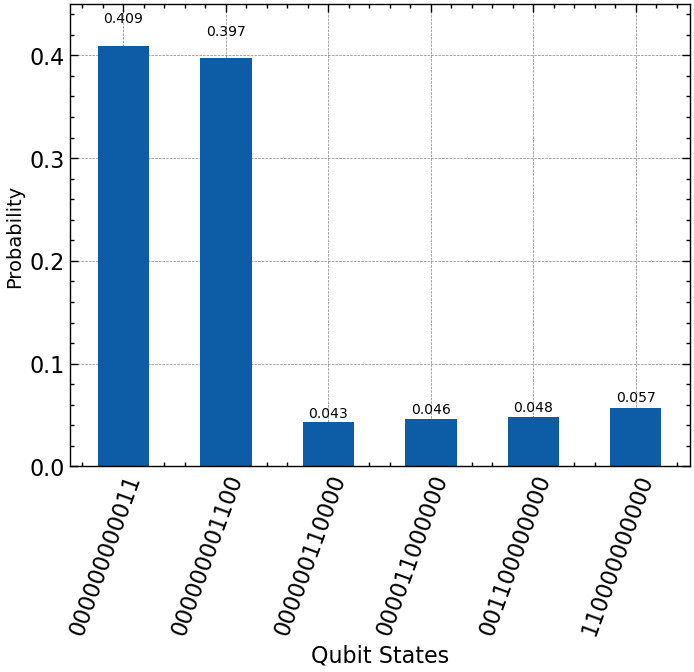

In [25]:


file = 'WF_parameters_vqe'+Optimizer_name+'_'+str(N_Qbits)+'.out'
with open(file,'w') as f:
    for p in params[-1]:
        f.write('{} \n'.format(p))

Ground = Ensatz(N_Qbits,gs_ini,params[-1])
Ground.measure_all()
backend = Aer.get_backend('statevector_simulator')
# job = backend.run(i_state)
shots=8000
job = backend.run(transpile(Ground, backend), shots=shots)
result = job.result()
COUNTS = result.get_counts(Ground)

for key,val in COUNTS.items():
    COUNTS[key] = val/shots

print(COUNTS)
from qiskit.visualization import plot_histogram

fig1,ax1 = plt.subplots(nrows=1, ncols=1)
plot_histogram(COUNTS,ax=ax1)
ax1.set_ylabel('Probability')
ax1.set_xlabel('Qubit States')
fig1.savefig('Wavefunctions_{}_JUN45_VQE_{}.png'.format(N_Qbits,Optimizer_name),dpi=350)
fig1.savefig('Wavefunctions_{}_JUN45_VQE_{}.pdf'.format(N_Qbits,Optimizer_name),format='pdf')
